# Final Project DSC 520 NSaenz

In [175]:
import pandas as pd
import numpy as np


from scipy.stats import binom
from scipy import stats
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt

import thinkstats2
import thinkplot
import hypothesis
from statistics import mode


from __future__ import print_function, division

import first
import scatter

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf 

In [143]:
df = pd.read_csv(r"C:\Users\Nick\DSC 530\project data sets\FinalBioDF2.csv")

In [144]:
print(df)

     Unnamed: 0      COUNTRY  Agricultural.Land.... Land.Area.Km2.  \
0             1  Afghanistan                   58.1        652,230   
1             2      Albania                   43.1         28,748   
2             3      Algeria                   17.4      2,381,741   
3             4      Andorra                   40.0            468   
4             5       Angola                   47.5      1,246,700   
..          ...          ...                    ...            ...   
160         161    Venezuela                   24.5        912,050   
161         162      Vietnam                   39.3        331,210   
162         163        Yemen                   44.6        527,968   
163         164       Zambia                   32.1        752,618   
164         165     Zimbabwe                   41.9        390,757   

     Forested.Area....         X2023  Population  Import..US..Thousand.  \
0                  2.1  1.910135e+10    38041754           1.964683e+06   
1        

The variables in the dataframe are as follows. 

Country labels each row based on what country the information describes. 

Agricultural land and forested area are both percantages of the total countries area that type of land occupies. 

Land.Area.Km2 provides the total amound of land a country occupies in units kilometers squared. 

X2023 is the GDP of each country from the year 2023 reported in US dollars. 

Population is the of the country in the year 2023. 

Import..US..Thousand is the US dollar amount in thousands that each country imported in the year 2023. 

Avg_21_23 is the average GDP of each country from the year 2021-2023 reported in US dollars.

invasive_count provides the total number of invasive species recorded in each country within the dataset.

landlocked is a variable that describes labels each landlocked country as "YES" and non-landlocked country as "NO"

In [145]:
print(df.describe())
print("The mode of   is " + str(mode(df["Agricultural.Land...."])))
print("The mode of   is " + str(mode(df["Forested.Area...."])))
print("The mode of   is " + str(mode(df["X2023"])))
print("The mode of   is " + str(mode(df["Population"])))
print("The mode of   is " + str(mode(df["Import..US..Thousand."])))
print("The mode of   is " + str(mode(df["Avg_21_23"])))
print("The mode of   is " + str(mode(df["invasive_count"])))


       Unnamed: 0  Agricultural.Land....  Forested.Area....         X2023  \
count  165.000000             161.000000         161.000000  1.650000e+02   
mean    83.000000              40.420435          30.434596  5.622942e+11   
std     47.775517              21.818884          23.274508  2.704367e+12   
min      1.000000               0.600000           0.000000  4.727146e+07   
25%     42.000000              23.300000          10.700000  1.102677e+10   
50%     83.000000              41.900000          30.900000  3.857407e+10   
75%    124.000000              58.000000          46.000000  2.376861e+11   
max    165.000000              82.600000          98.300000  2.772000e+13   

         Population  Import..US..Thousand.     Avg_21_23  invasive_count  
count  1.650000e+02           1.650000e+02  1.650000e+02      165.000000  
mean   4.209042e+07           1.042947e+08  5.585300e+11       86.836364  
std    1.564359e+08           3.173332e+08  2.531793e+12      152.952619  
min   

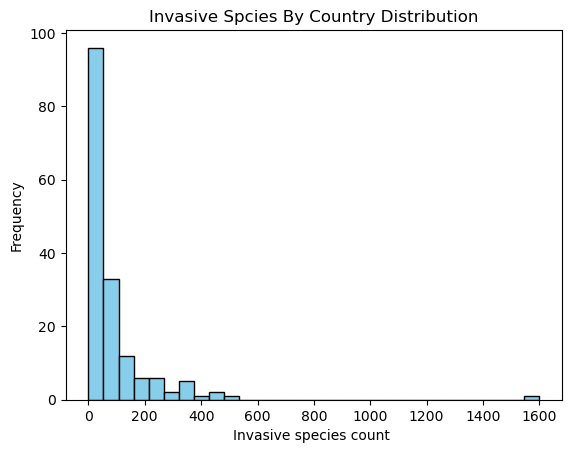

In [146]:
plt.hist(df["invasive_count"], bins=30 ,range=(0, 1600) , color='skyblue', edgecolor='black')
plt.xlabel("Invasive species count ")
plt.ylabel("Frequency")
plt.title("Invasive Spcies By Country Distribution")
plt.show()

Agricultural.Land....

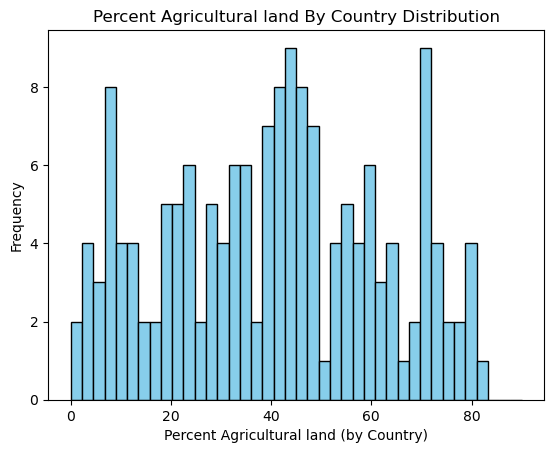

In [147]:
plt.hist(df["Agricultural.Land...."], bins=40 ,range=(0, 90) , color='skyblue', edgecolor='black')
plt.xlabel("Percent Agricultural land (by Country)")
plt.ylabel("Frequency")
plt.title("Percent Agricultural land By Country Distribution")
plt.show()

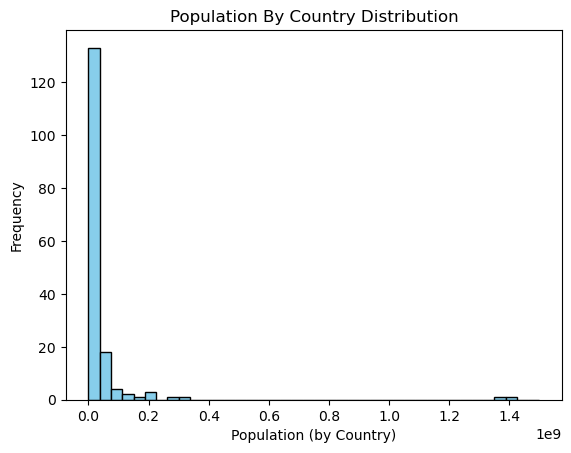

In [148]:
plt.hist(df["Population"], bins=40,range=(0, 1500000000) , color='skyblue', edgecolor='black')
plt.xlabel("Population (by Country)")
plt.ylabel("Frequency")
plt.title("Population By Country Distribution")
plt.show()

Same popluation graph, but zoomed in to ignore an outlier and get better definition for the other data points.

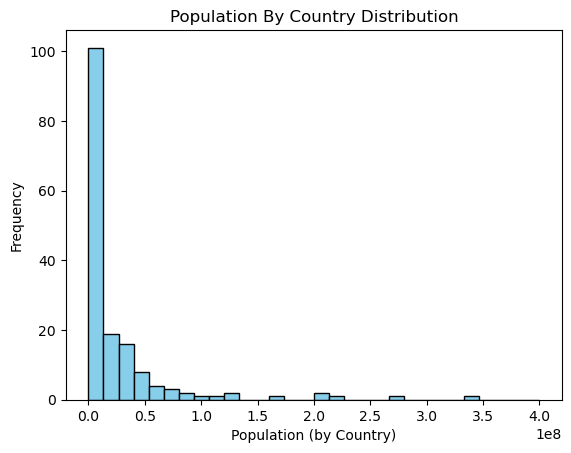

In [149]:
plt.hist(df["Population"], bins=30,range=(0, 400000000) , color='skyblue', edgecolor='black')
plt.xlabel("Population (by Country)")
plt.ylabel("Frequency")
plt.title("Population By Country Distribution")
plt.show()

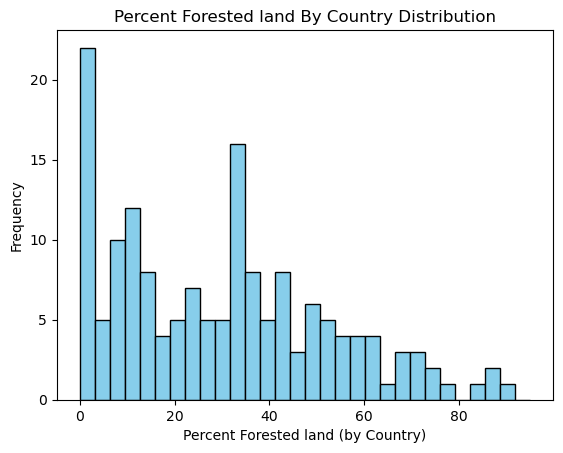

In [150]:
plt.hist(df["Forested.Area...."], bins=30 ,range=(0, 95) , color='skyblue', edgecolor='black')
plt.xlabel("Percent Forested land (by Country)")
plt.ylabel("Frequency")
plt.title("Percent Forested land By Country Distribution")
plt.show()

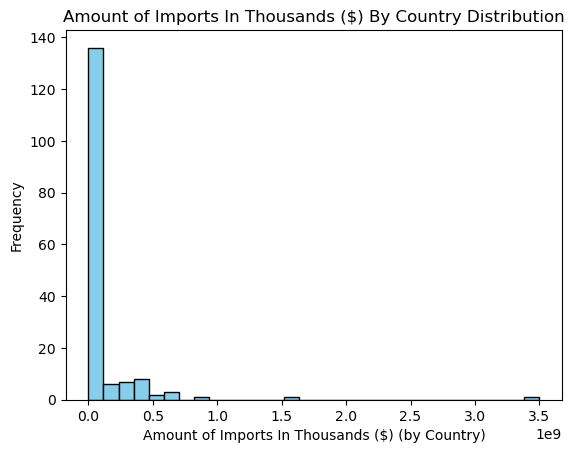

In [151]:
plt.hist(df["Import..US..Thousand."], bins=30 ,range=(0, 3500000000) , color='skyblue', edgecolor='black')
plt.xlabel("Amount of Imports In Thousands ($) (by Country)")
plt.ylabel("Frequency")
plt.title("Amount of Imports In Thousands ($) By Country Distribution")
plt.show()

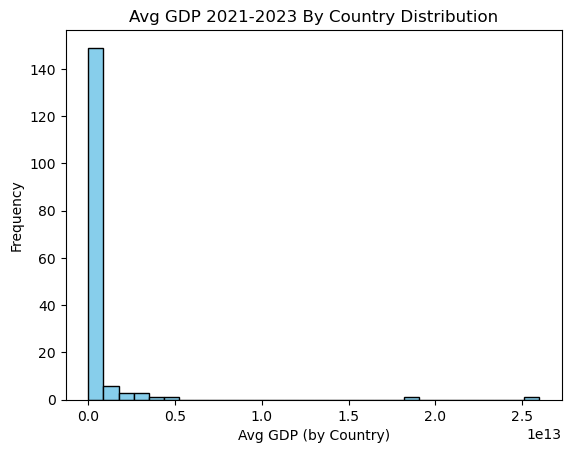

In [152]:
plt.hist(df["Avg_21_23"], bins=30 ,range=(0, 26000000000000) , color='skyblue', edgecolor='black')
plt.xlabel("Avg GDP (by Country)")
plt.ylabel("Frequency")
plt.title("Avg GDP 2021-2023 By Country Distribution")
plt.show()

Same GDP graph, but zoomed in to ignore an outlier and get better definition for the other data points.

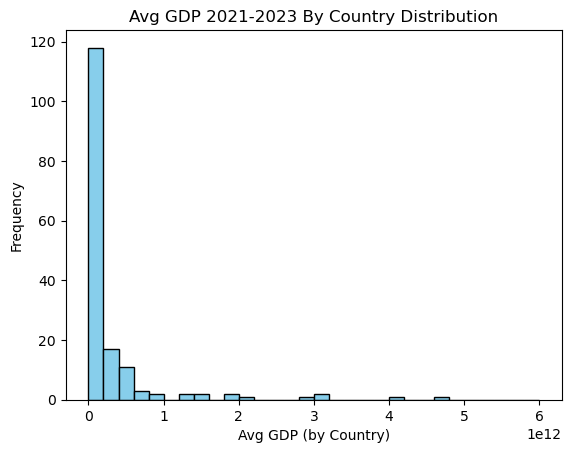

In [153]:
plt.hist(df["Avg_21_23"], bins=30 ,range=(0, 6000000000000) , color='skyblue', edgecolor='black')
plt.xlabel("Avg GDP (by Country)")
plt.ylabel("Frequency")
plt.title("Avg GDP 2021-2023 By Country Distribution")
plt.show()

Create new dataframes for landlocked and non landlocked countries

In [154]:
Land_Lock = df[df['landlocked'] == "YES"]
Not_Land_Lock = df[df['landlocked'] == "NO"]

Grab the invasive counts associated with each landlocked and non landocked countries

In [155]:
LandlockedInv = Land_Lock['invasive_count']
Not_LandlockedInv = Not_Land_Lock['invasive_count']

In [156]:
pmf_Landlock = thinkstats2.Pmf(LandlockedInv)
pmf_NotLandlock = thinkstats2.Pmf(Not_LandlockedInv)

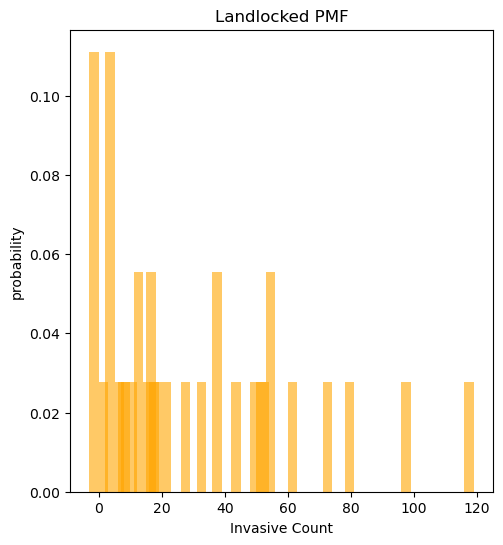

In [172]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_Landlock, align="right", width=3, color="orange")
thinkplot.Config(title="Landlocked PMF",xlabel="Invasive Count", ylabel= "probability")

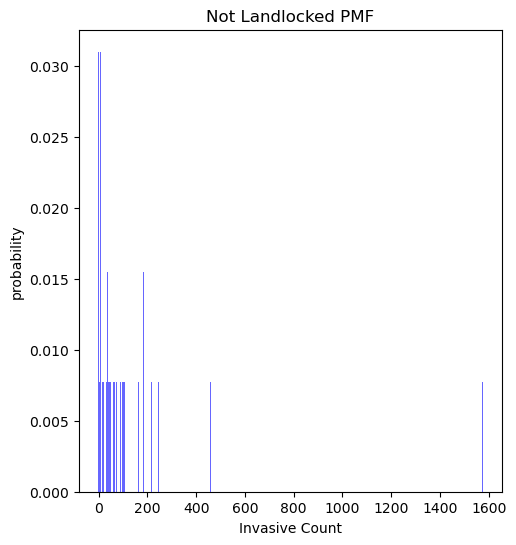

In [171]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_NotLandlock, align="right", width=1, color="blue")
thinkplot.Config(title="Not Landlocked PMF", xlabel="Invasive Count", ylabel= "probability")

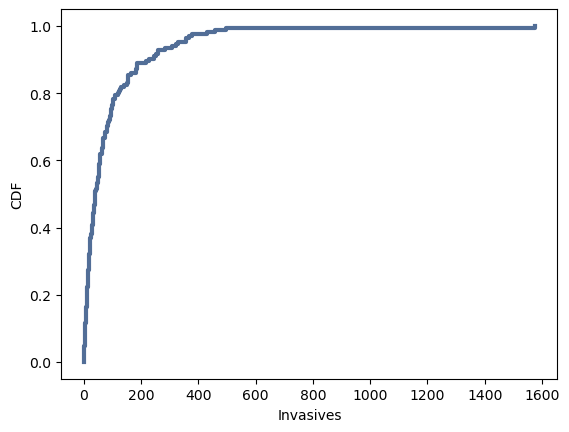

In [159]:
cdf = thinkstats2.Cdf(df['invasive_count'], label='Invasive count Probability')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Invasives', ylabel='CDF', loc='upper left')

Notice the last small uptick at the end of the curve this is the United states with the highest number of invasive species.

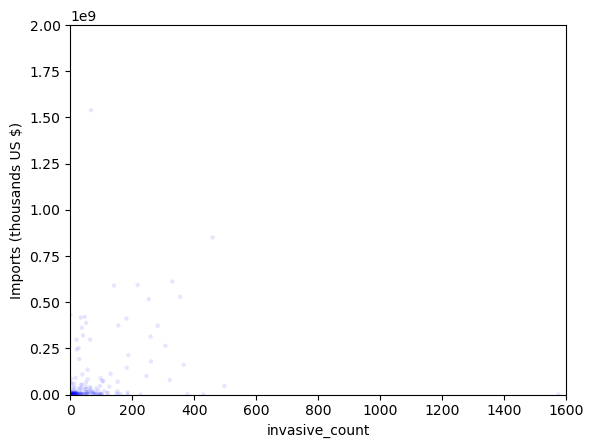

In [160]:
thinkplot.Scatter(df['invasive_count'], df['Import..US..Thousand.'], alpha=0.1, s=10)
thinkplot.Config(xlabel='invasive_count',
                 ylabel="Imports (thousands US $)",
                 axis=[0,1600,0,2e9],
                 legend=False)

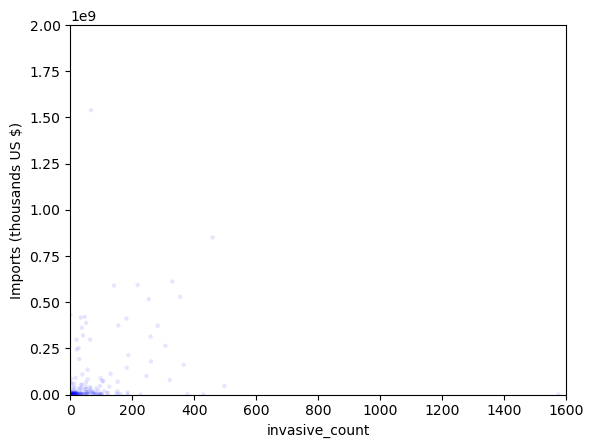

In [161]:
thinkplot.Scatter(df['invasive_count'], df['Import..US..Thousand.'], alpha=0.1, s=10)
thinkplot.Config(xlabel='invasive_count',
                 ylabel="Imports (thousands US $)",
                  axis=[0,1600,0,2e9],
                 legend=False)

Adjusting the imports vs invasives scatterplotwe can ignor the US which is the outlier by far we can get better seapration on all other data points.

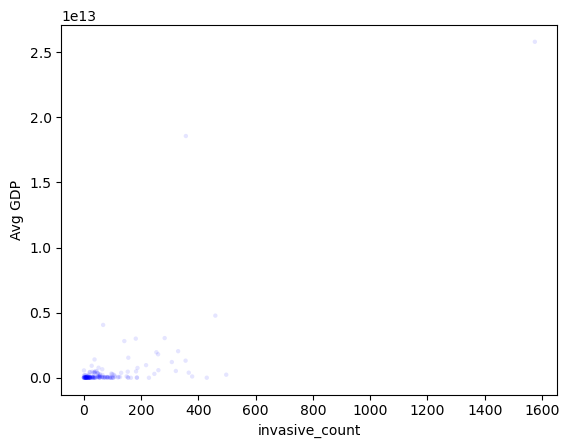

In [162]:
thinkplot.Scatter(df['invasive_count'], df['Avg_21_23'], alpha=0.1, s=10)
thinkplot.Config(xlabel='invasive_count',
                 ylabel="Avg GDP",
                 legend=False)

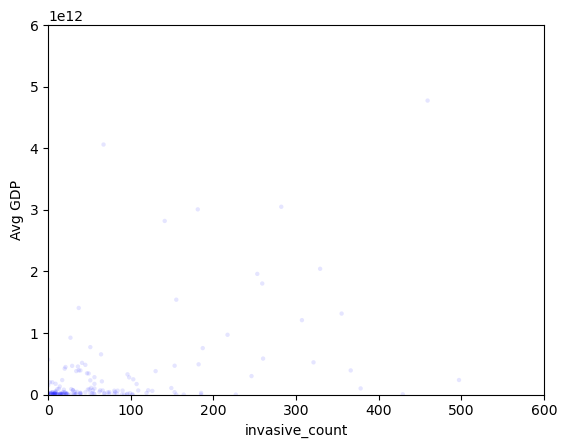

In [163]:
thinkplot.Scatter(df['invasive_count'], df['Avg_21_23'], alpha=0.1, s=10)
thinkplot.Config(xlabel='invasive_count',
                 ylabel="Avg GDP",
                axis=[0,600,0,0.6e13],
                 legend=False)

Hypothesis landlocked countries have a lower average mean of inavasive species than non land locked countries. We create some new data frames separating these two groups.

In [164]:
print(Not_LandlockedInv)

1        8
2        9
4       28
5       15
6      321
      ... 
157     80
159     92
160     45
161     47
162     20
Name: invasive_count, Length: 129, dtype: int64


In [165]:
len(LandlockedInv)

36

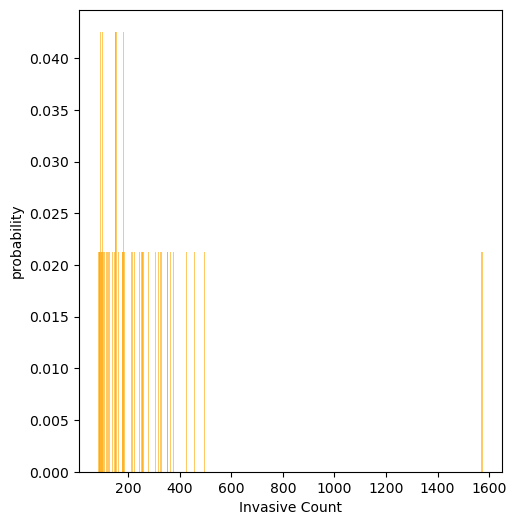

In [166]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_above, align="right", width=5, color="orange")
thinkplot.Config(xlabel="Invasive Count", ylabel= "probability")

In [173]:
list = []


i = 0
while i < 10:
    
    subset_NotLocked= Not_LandlockedInv.sample(n=36)
    statistic, p_valu = wilcoxon(LandlockedInv, subset_NotLocked)
    list.append(tuple((statistic, p_valu)))
    i += 1

print(list)

[(167.5, 0.008164219470927492), (120.0, 0.0005099171248730272), (110.5, 0.00025036028819158673), (146.5, 0.0057805227977709575), (134.0, 0.0030295430006892702), (111.5, 0.000269419135292992), (177.0, 0.013287985610077158), (169.5, 0.028620555847347882), (142.0, 0.0020792766590602696), (201.5, 0.03775702390703373)]


The data in each group is highly skewed. So I used a wilcox test to determine if there is a meaningful difference between the invasive counts of landlocked and not landlocked countries. To do Wilcox the sample sizes must be the same. So I resampled the Not Lnadlocked data set randomly ten time to compare to the landlocked set of 37 countries. Out of 10 wilcox tests comparing means. All 10 showed a large static with nine out of 10 p-values being significant with a cut off of 0.05.

Our hypothesis test indicates a large and statisticaly significant difference between group means. Suggesting that countries that are not lanlocked tend to have much lower rate of invasive species than non-landlocked countries.

In [174]:
correl = df.corr()['invasive_count'].drop('invasive_count')

print(correl)

Unnamed: 0               0.115904
Agricultural.Land....   -0.000049
Forested.Area....        0.139193
X2023                    0.755195
Population               0.329767
Import..US..Thousand.    0.230383
Avg_21_23                0.757606
Name: invasive_count, dtype: float64


C:\Users\Nick\AppData\Local\Temp\ipykernel_28376\2806771964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.corr()['invasive_count'].drop('invasive_count')


When finding the corelations between invasive counts and all other variables we see that avg gdp and population are correlated the highest correlations. So we will choose these two variables to build a model on.

In [168]:
model = smf.ols(formula='invasive_count ~ Avg_21_23 + Population', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         invasive_count   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           1.95e-32
Time:                        12:33:34   Log-Likelihood:                -989.23
No. Observations:                 165   AIC:                             1984.
Df Residuals:                     162   BIC:                             1994.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0056      7.929      8.198      0.0